## 一、离散性测度
https://zhuanlan.zhihu.com/p/344919136

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
data = np.array([2038, 1758, 1721, 1637, 2097, 2047, 2205, 1787,
                 2287, 1940, 2311, 2054, 2406, 1471, 1460])

### 极差
极差的概念很容易理解，一个样本中最大与最小观测值之间的差异称为极差（range）。

In [2]:
def range_value(data):
    """
    Compute range of data
    :param data: array_like data
    :return: range
    """
    return max(data) - min(data)

In [3]:
range_value(data)

946

### 平均离差
平均离差就是样本中全部数值与它们均值变动的平均数量来度量离散程度。

In [4]:
def mean_deviation(data):
    """
    Compute the mean of deviation
    :param data: array_like
    :return: mean deviation
    """
    s = 0.0
    m = np.mean(data)
    for v in data:
        s += abs(v - m)
    return s / len(data)

In [5]:
mean_deviation(data)

248.20444444444445

### 分位数
分位数也叫百分位数，最常使用的有四分位数（25，50，75），五分位数（20，40，60，80）和百分位数（10，20，30，...，90）。以下以四分位数为例，其他分位数也是同理。

In [6]:
np.percentile(data, [25, 50, 75])

array([1739.5, 2038.0, 2151.0])

### 方差和标准差

这两个测度标准是日常统计中应用非常广泛而且频繁的指标之一。

平均离差由于存在一些不足，比如绝对值处理问题、当数据分布呈钟形时，它的分散性特征不是特别理想。所以正常情况下，我们都会运用方差和标准差。

我们主要应用样本方差和样本标准差，样本跟总体区别在于样本分母少一个1，也就是少了一个自由度。

In [7]:
def std(data):
    """
    Compute standard deviation of sample
    :param data: array_like data
    :return: standard deviation of sample
    """
    return np.std(data, ddof=1)

In [8]:
std(data)

298.78909586784425

代码中用到了np.std()函数来计算，注意它的第二个参数ddof是自由度，把它设置为默认等于1，这样计算的就是样本方差，如果不设置自由度的话，np.std()函数计算的是总体标准差。

大约有68%的数据在均值的一个标准差范围内，大约有95%的数据在均值的两个标准差范围内，大约有99%的数据在均值的三个标准差范围内。

### 变异系数

方差的量纲是原数据量纲的平方，标准差的量纲跟原数据的量纲是一样的，这就是为什么标准差运用得比方差更广泛。但是，在不同量纲的数据之间做比较时，标准差就不能使用了，因为单位都不一样，不用简单作比较。

In [9]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

In [10]:
cv(data)

15.338774215468234

## 二、位置测度
https://zhuanlan.zhihu.com/p/344780317

### 样本均值（算术平均数）

In [11]:
def mean(data):
    """
    performance average
    :param data: array_like contain data
    :return: mean of data
    """
    return np.mean(data)

In [12]:
mean(data)

1947.9333333333334

### 加权平均数
加权平均数是算术平均数的一种特殊情形。当有几个相同数值的观测值时，算术平均数就会变成加权平均数。

In [13]:
def weight_mean(data, weight):
    """
    compute the weighted arithmetic mean
    :param data: array_like data
    :param weight: array_like weight
    :return: weighted arithmetic mean
    """
    return np.dot(data, weight) / np.sum(weight)

In [14]:
data2 = [9, 12, 15]
weight2 = [3, 4, 3]
weight_mean(data2, weight2)

12.0

### 中位数
将一组数据从最小到最大、或者从最大到最小排序以后，位于中点的数值。

In [15]:
def median(data):
    """
    find the median number from data
    :param data: array_like data
    :return: median
    """
    return np.median(data)

In [16]:
median(data)

2038.0

### 众数

在一个样本的所有观察值中，发生频率最大的一个值称为样本的众数。通俗的说就是出现次数最多的那个数。

In [17]:
def mode(data):
    """
    Compute mode
    :param data: array_like data
    :return: mode number
    """
    m, cnt = stats.mode(data)
    print("mode:", m, ", counts:", cnt)

In [18]:
data3 = [7, 35, 35, 5, 5, 5, 9, 9, 9, 9, 8, 8, 8, 8, 8,
        3, 3, 3, 3, 3, 3, 10, 10, 10, 10, 10, 10, 10,
        12, 12, 12, 12, 12, 12, 12, 12, 8, 8, 8, 8, 8,
        8, 8, 8, 8]
mode(data3)

mode: [8] , counts: [14]


求得众数是8，频率是14。

另外，如果每个数值都不一样，那么就不存在众数；而有时候有可能会出现2个众数，称为双峰分布；而有时候会出现三个众数，称为三峰分布。

### 几何平均
几何平均数在商业、工业、金融当中应用非常广泛，特别是涉及到随时间推移的平均变动时，几何平均数就派上用场。比如计算营业额增长率、复利、GDP等。

某上市公司连续4年的投资回报率分别为：30%、20%、-40%、200%，则该公司这4年的平均投资回报率是多少？

对于这种包含有时间推移的平均值求值，应该用几何平均数。因为数据里面包含有负数，无法进行开方。我们需要对公式进行简单的调整，每个数值加上1使其为正，然后总数再减去1，本题这里的1代表初始投资，1.3就是初始投资1加上回报0.3，以此类推：

In [19]:
def geom_mean(data):
    """
    Compute geometric mean
    :param data: array_like data
    :return: geometric mean
    """
    return stats.gmean(data)

In [20]:
data4 = np.array([1.3, 1.2, 0.6, 3])
geom_mean(data4) - 1

0.29449171695004406

### 调和平均：

调和平均数仅适合于有限数量的应用情形，比如计算股票的平均成本等。它是对于观测值的倒数进行求和后再求平均，最后将平均值求倒数后得到。

调和平均数可以看作是一种特殊形式的加权平均数，其观测值的权重与其大小成反比。

In [21]:
def harm_mean(data):
    """
    Compute harmonic mean
    :param data: array_like data
    :return: harmonic mean
    """
    return stats.hmean(data)

有一种投资策略，即成本平均。假设一名投资者每个月定投1000欧元的股票，连续投了8个月，该股票在每个购买时点的价格分别是：10欧元、15欧元、20欧元、15欧元、18欧元、20欧元、29欧元、30欧元。求定投该股票的平均价格是多少？

In [22]:
data5 = np.array([10, 15, 20, 15, 18, 20, 29, 30])
harm_mean(data5)

17.516778523489933

## 三、切比雪夫、偏度及峰度
https://zhuanlan.zhihu.com/p/346810231

### 切比雪夫定理

对于任意一组观察值（样本或总体），分布在均值 正负k 倍标准差范围内的值的比例至少为 1-1/k^2 ，其中  k 是任意一个大于1的值。切比雪夫定理给的是一个下限，注意定义中的“至少”。

杜普雷油漆公司的雇员投资于该公司的月度投资额的算术平均值是51.54美元，标准差是7.51美元。请问至少有多大比例的投资额分布在均值正负3.5倍标准差之间？

In [23]:
k=3.5
1-1/(k*k)

0.9183673469387755

投资额在正负3.5个标准差之间的比例至少为91.84%。

当得知样本观察值呈正态分布时，可以用前面的正态经验法则来评估数据大约有多大比例集中在什么范围内；当然，如果不清楚数据分布情况，或者数据分布不是正态分布，那么我们可以利用切比雪夫定理来做评估。

### 偏度（skewness）

一个分布如果不对称，则被称为偏度。分布有对称、正偏（右偏）、负偏（左偏）。正偏的分布表现出右侧长尾，负偏的分布具有左侧长尾。正偏的单峰分布，其众数要小于中位数，而中位数又小于均值；负偏的单峰分布刚好相反。

### 对称
对称分布的偏度时0，因为它是左右对称的。

In [24]:
def std_plot():
    """
    draw standard deviation normal distribution
    """
    mu = 0.0    # mean
    sd = 1.0    # std
    x = np.linspace(mu - 4 * sd, mu + 4 * sd, 50) # x range
    y = stats.norm.pdf(x)
    plt.plot(x, y, "r", linewidth = 2)
    plt.grid(True)  # 显示网格线
    plt.show()

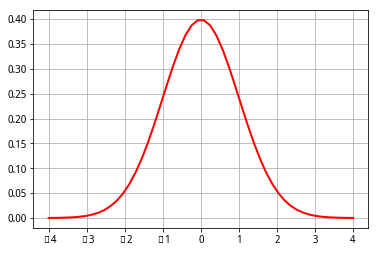

In [25]:
std_plot()

### 右偏
右偏表现为右侧长尾。

In [26]:
def std_plot():
    """
    draw standard deviation normal distribution
    """
    mu = 0.0    # mean
    sd = 1.0    # std
    x = np.linspace(mu - 2 * sd, mu + 5 * sd, 50) # x range
    y = stats.norm.pdf(x)
    plt.plot(x, y, "r", linewidth = 2)
    plt.grid(True)  # 显示网格线
    plt.show()

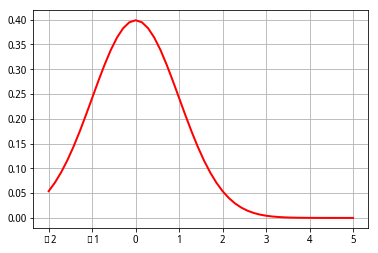

In [27]:
std_plot()

### 左偏
左偏表现为左侧长尾

In [28]:
def std_plot():
    """
    draw standard deviation normal distribution
    """
    mu = 0.0    # mean
    sd = 1.0    # std
    x = np.linspace(mu - 5 * sd, mu + 2 * sd, 50) # x range
    y = stats.norm.pdf(x)
    plt.plot(x, y, "r", linewidth = 2)
    plt.grid(True)  # 显示网格线
    plt.show()

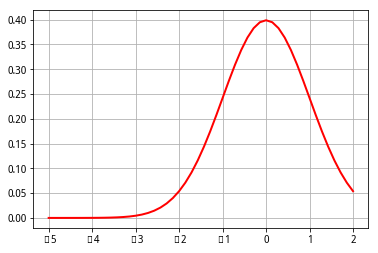

In [29]:
 std_plot()

### 偏度计算公式
样本偏度（sample skewness）有时候也称为样本相对偏度（sample relative skewness）

In [30]:
def skewness(a):
    """
    Compute the sample skewness of a data set.
    :param a array_like
    :return skewness of sample
    """
    return stats.skew(a, bias=False)

In [31]:
data5 = np.array([25.78, 15.05, 4.26, 19.14, 3.30, -35.75, 25.62, 15.15, -0.72, 17.25])
skewness(data5)

-1.8357348616394247

根据计算结果，说明该基金收益率出现负偏，可能是因为2008年金融危机影响，受比较差的业绩影响，该基金收益率分布向左偏离。

上面用到了stats.skew()函数，注意第二个参数bias设置为False，它默认是True。如果是False会对统计结果进行修正。

在金融定量投资分析中，一个正偏的收益率分布会比较频繁出现小的损失和一些极大的收益率，一个负偏的收益率分布会比较频繁地出现小收益和一些极大的损失。

### 峰度（kurtosis）

峰度是一个统计度量指标，它告诉我们一个分布的峰值比正态分布更高还是更低。

标准差越小，曲线越陡；标准差越大，曲线越平缓。红色线条标准差是1，绿色线条标准差是2，标准差越大，会越矮。一个分布的峰值如果比正态分布要大，称其为尖峰的（leptokurtic），一个分布的峰度如果等于正态分布，称其为中峰的（mesokurtic），一个分布的峰度如果比正态分布要小，称其为低峰的（platykurtic）。


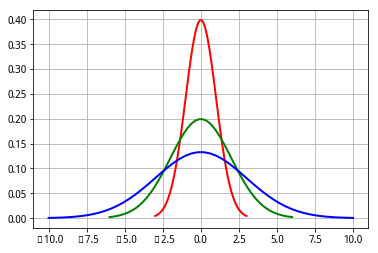

In [32]:
def std_plot():
    """
    draw standard deviation normal distribution
    """
    mu = 0.0    # mean
    sd = 1.0    # std
    sd2 = 2.0
    sd3 = 3.0

    # red line
    x = np.linspace(mu - 3 * sd, mu + 3 * sd, 50) # x range
    y = stats.norm.pdf(x)
    plt.plot(x, y, "r", linewidth = 2)

    # green line
    x2 = np.linspace(mu - 6 * sd, mu + 6 * sd, 50) # x range
    y2 = stats.norm.pdf(x2, mu, sd2)
    plt.plot(x2, y2, "g", linewidth = 2)

    # blue line
    x3 = np.linspace(mu - 10 * sd, mu + 10 * sd, 50) # x range
    y3 = stats.norm.pdf(x3, mu, sd3)
    plt.plot(x3, y3, "b", linewidth = 2)

    plt.grid(True)  # 显示网格线
    plt.show()


std_plot()

### 峰度计算公式

对于所有正态分布来说峰度等于3，许多统计软件会给出超额峰度（excess kurtosis），也就是峰度减去3之后的值。一个正态分布或者其他中峰分布的超额峰度为0， 一个尖峰分布的超额峰度大于0，一个低峰分布的超额峰度小于0。

某基金2008年到2018年10年的收益率（%）分别是：25.78， 15.05， 4.26， 19.14， 3.30， -35.75， 25.62， 15.15， -0.72， 17.25。请计算该样本的峰度，并描述其收益率分布的形状（尖峰、中峰、低峰）？

In [33]:
def kurtosis(a):
    """
    Compute the sample kurtosis of a data set.
    :param a array_like
    :return kurtosis of sample
    """
    return stats.kurtosis(a, bias=False)

In [34]:
data6 = np.array([25.78, 15.05, 4.26, 19.14, 3.30, -35.75, 25.62, 15.15, -0.72, 17.25])
kurtosis(data6)

4.093384492658573

计算得到该基金10年的收益率超额峰度为4.09，该值大于0，所以是尖峰厚尾分布的。